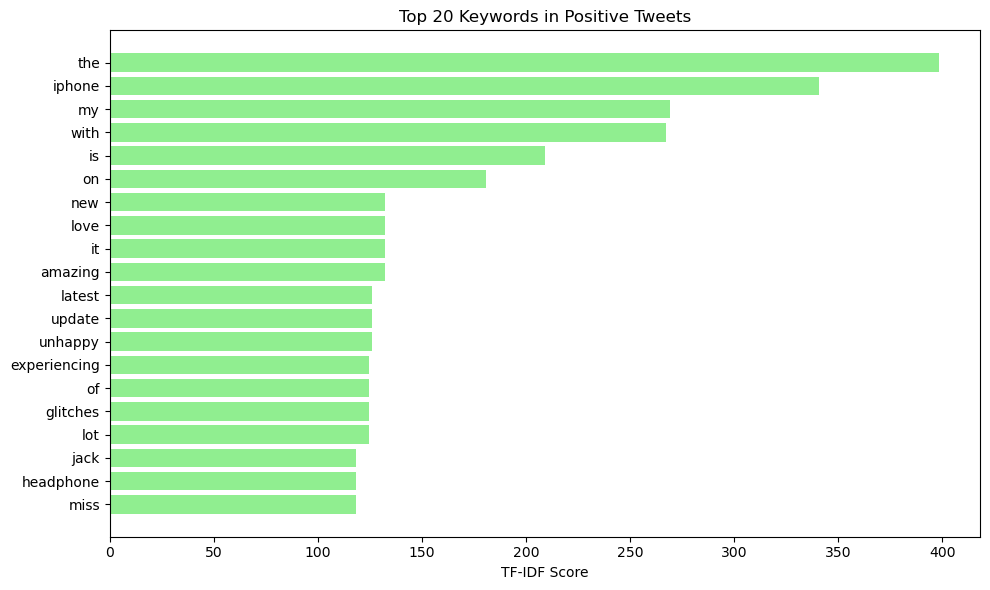

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
train_data = pd.read_csv('iphone_twitter_sentiment_sample.csv')
test_data = pd.read_csv('iphone_test.csv')

# Filter positive tweets
positive_tweets = train_data[train_data['Label'] == 1]['Tweet']

# Use TF-IDF Vectorizer to convert text data into numerical features for positive tweets
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_positive = vectorizer.fit_transform(positive_tweets)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Calculate TF-IDF scores for each word and sum over all positive tweets
tfidf_scores = X_positive.sum(axis=0).A1

# Create a DataFrame with words and their TF-IDF scores
word_scores = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort words by their TF-IDF scores and get the top 20 most important words in positive tweets
top_20_positive_words = word_scores.sort_values('TF-IDF Score', ascending=False).head(20)

# Plotting the top 20 most important words in positive tweets
plt.figure(figsize=(10, 6))
plt.barh(top_20_positive_words['Word'], top_20_positive_words['TF-IDF Score'], color='lightgreen')
plt.xlabel('TF-IDF Score')
plt.title('Top 20 Keywords in Positive Tweets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


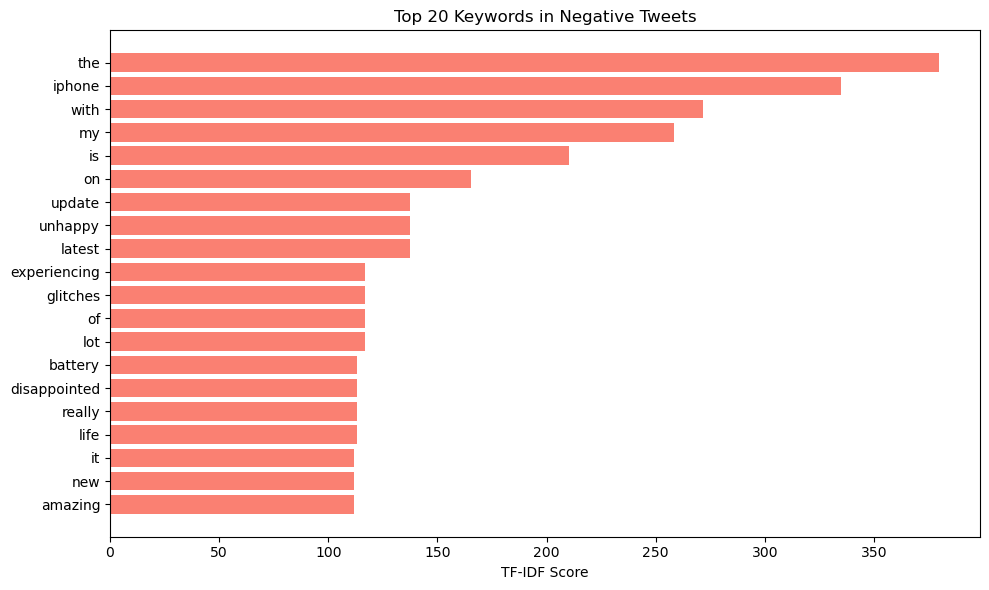

In [3]:
# Assuming 'vectorizer' is already fitted on some dataset
X_negative = vectorizer.transform(negative_tweets)
tfidf_scores = X_negative.sum(axis=0).A1
feature_names = vectorizer.get_feature_names_out()  # Get feature names correctly

# Ensure lengths are the same
if len(feature_names) == len(tfidf_scores):
    word_scores = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})
    top_20_negative_words = word_scores.sort_values('TF-IDF Score', ascending=False).head(20)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(top_20_negative_words['Word'], top_20_negative_words['TF-IDF Score'], color='salmon')
    plt.xlabel('TF-IDF Score')
    plt.title('Top 20 Keywords in Negative Tweets')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("Error: Mismatch in lengths of feature names and TF-IDF scores.")


# XGBoost

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train_vec, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.52      0.61      0.57       498
           1       0.54      0.45      0.49       504

    accuracy                           0.53      1002
   macro avg       0.53      0.53      0.53      1002
weighted avg       0.53      0.53      0.53      1002



# Logistic Regression

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)  # You can adjust parameters like max_iter

# Fit the model on the training data
log_reg.fit(X_train_vec, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.52      0.61      0.57       498
           1       0.54      0.45      0.49       504

    accuracy                           0.53      1002
   macro avg       0.53      0.53      0.53      1002
weighted avg       0.53      0.53      0.53      1002



# SVM

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize SVM classifier
svm = SVC(kernel='linear')  # Using a linear kernel for simplicity

# Fit the model on the training data
svm.fit(X_train_vec, y_train)

# Predict on the test data
y_pred = svm.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.52      0.61      0.57       498
           1       0.54      0.45      0.49       504

    accuracy                           0.53      1002
   macro avg       0.53      0.53      0.53      1002
weighted avg       0.53      0.53      0.53      1002



# Random Forest

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Fit the model on the training data
random_forest.fit(X_train_vec, y_train)

# Predict on the test data
y_pred = random_forest.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.52      0.61      0.57       498
           1       0.54      0.45      0.49       504

    accuracy                           0.53      1002
   macro avg       0.53      0.53      0.53      1002
weighted avg       0.53      0.53      0.53      1002



# Fine tuning the models

# Fine tuning XGBoost

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Define hyperparameters to search through
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', verbose=2)  # Set verbose=2 for more output
grid_search.fit(X_train_vec, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train_vec, y_train)

# Predict on the test data using the best model
y_pred = best_xgb.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_es

# FIne tuning Logistic regression model

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)  # You can adjust parameters like max_iter

# Define hyperparameters to search through
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Algorithms for optimization
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', verbose=2)  # Set verbose=2 for more output
grid_search.fit(X_train_vec, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_log_reg = LogisticRegression(**best_params, max_iter=1000)
best_log_reg.fit(X_train_vec, y_train)

# Predict on the test data using the best model
y_pred = best_log_reg.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ................................C=0.1, solver=lbfgs; total time=   0.0s
[CV] END ............................C=1.0, solver=liblinear; total time=   0.0s
[CV] END ............................C=1.0, solver=liblinear; total time=   0.0s
[CV] END ............................C=1.0, solver=liblinear; total time=   0.0s
[CV] END ................................C=1.0, solver=lbfgs; total time=   0.0s
[CV] END ................................C=1.0, solver=lbfgs; total time=   0.0s
[CV] END ................................C=1.0, s

# Fine tune SVM model

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize SVM classifier
svm = SVC()

# Define hyperparameters to search through
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=2)  # Set verbose=2 for more output
grid_search.fit(X_train_vec, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_svm = SVC(**best_params)
best_svm.fit(X_train_vec, y_train)

# Predict on the test data using the best model
y_pred = best_svm.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.2s
[CV] END ...............................C=1.0, kernel=linear; total time=   1.0s
[CV] END ...............................C=1.0, kernel=linear; total time=   0.9s
[CV] END ...............................C=1.0, kernel=linear; total time=   0.9s
[CV] END ..................................C=1.0, kernel=rbf; total time=   1.1s
[CV] END ..................................C=1.0, kernel=rbf; total time=   1.1s
[CV] END ..................................C=1.0,

# Fine tuning random forest model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Separate features and labels
X = data['Tweet']
y = data['Label'].astype(int)  # Assuming labels are numeric (0 for negative, 1 for positive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF Vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform on the training data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize Random Forest classifier
random_forest = RandomForestClassifier()

# Define hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy', verbose=2)  # Set verbose=2 for more output
grid_search.fit(X_train_vec, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(X_train_vec, y_train)

# Predict on the test data using the best model
y_pred = best_random_forest.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END m

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total tim

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total ti

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.0s
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.52      0.61      0.57       498
           1       0.54      0.45      0.49       504

    accuracy                           0.53      1002
   macro avg       0.53      0.53      0.53      1002
weighted avg       0.53      0.53      0.53      1002



# Calculating overall sentiment score

In [12]:
# Assuming 'best_xgb' is the best trained XGBoost model from earlier code
# Use predict_proba to get the probabilities of each class (0 and 1)
proba = best_xgb.predict_proba(X_test_vec)

# Assuming the second column corresponds to positive sentiment (1)
positive_sentiment_scores = proba[:, 1]

# Calculate the average sentiment score for the entire test set
overall_sentiment_score = positive_sentiment_scores.mean()
print(f"Overall Sentiment Score: {overall_sentiment_score:.4f}")


Overall Sentiment Score: 0.5044


# overall sentiment of the tweets are positive and in general people have a positive opinion about iphones

# identifying positive and negative words and printing positive and negative tweets

In [16]:
from textblob import TextBlob
import pandas as pd
from collections import Counter

# Load your dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Get the tweets
tweets = data['Tweet']

positive_words = []
negative_words = []

# Analyze the sentiment of each tweet and extract positive/negative words
for tweet in tweets:
    analysis = TextBlob(tweet)
    for word, tag in analysis.tags:
        if tag == 'JJ' and analysis.sentiment.polarity > 0:
            positive_words.append(word)
        elif tag == 'JJ' and analysis.sentiment.polarity < 0:
            negative_words.append(word)

# Count occurrences of positive and negative words
positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

# Display the top 3 positive and negative words and their counts
print("Top 10 Positive Words:", positive_counts.most_common(10))
print("Top 10 Negative Words:", negative_counts.most_common(10))


Top 10 Positive Words: [('new', 514), ('amazing', 514), ('top-notch', 496), ('sleek', 495), ('elegant', 495), ('big', 495), ('incredible', 468)]
Top 10 Negative Words: [('unhappy', 511), ('disappointed', 487), ('frustrating', 1), ('disappointing', 1), ('poor', 1), ('limited', 1), ('innovative', 1), ('user', 1), ('low', 1)]


In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv('iphone_twitter_sentiment_sample.csv')

# Define the identified positive and negative words
positive_words = ['new', 'amazing', 'happy', 'top-notch', 'sleek', 'elegant', 'big', 'incredible']
negative_words = ['disappointed', 'frustrating', 'disappointing', 'poor', 'limited', 'innovative', 'user', 'low', 'unhappy']

# Filter unique positive and negative tweets
positive_tweets = data[data['Tweet'].str.contains('|'.join(positive_words), case=False)]
negative_tweets = data[data['Tweet'].str.contains('|'.join(negative_words), case=False)]

# Display unique positive tweets
print("Unique Positive Tweets:")
unique_positive_tweets = positive_tweets[~positive_tweets.duplicated(subset='Tweet')][['ID', 'Tweet']].head(5)
print(unique_positive_tweets)

print("\nUnique Negative Tweets:")
unique_negative_tweets = negative_tweets[~negative_tweets.duplicated(subset='Tweet')][['ID', 'Tweet']].head(5)
print(unique_negative_tweets)


Unique Positive Tweets:
    ID                                             Tweet
1    2                 Love my new iPhone, it's amazing!
3    4  iPhone's design is sleek and elegant, a big fan!
6    7            The camera on the iPhone is top-notch.
10  11            unhappy with the latest iPhone update.
26  27      iPhone's performance is incredible, so fast!

Unique Negative Tweets:
        ID                                              Tweet
0        1  Really disappointed with my iPhone's battery l...
10      11             unhappy with the latest iPhone update.
5000  5001  The iPhone's battery drains too quickly, very ...
5001  5002  Constantly facing issues with my iPhone's perf...
5004  5005  The iPhone's camera quality is poor, not meeti...
